In [1]:
import sys
sys.path.append("/home/ly/workspace/mmsa")
seed = 1938
import numpy as np
import torch
from torch import nn
from torch import optim

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
from models.lymodel5 import *
from utils.train import *
from typing import *
from collections import Counter
from utils.load_yelp import *
from utils.dataset import *
from utils.train import *
from utils.train import *

config

{'task': 'CLS',
 'embedding_dim': 100,
 'embedding': None,
 'freeze_embedding': True,
 'text_hidden_size': 100,
 'text_layers': 1,
 'max_tokens': 512,
 'uniform_bound': 0.1,
 'img_input_size': 2048,
 'img_encoder_layers': 1,
 'attention_nhead': 4,
 'fusion_nheads': 4,
 'dropout': 0.1,
 'output_size': 5,
 'bias_init': 1.0}

In [3]:
batch_size = 64
workers = 4
train_set, valid_set, test_set= load_glove_data(split811data, config)
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()
get_parameter_number(model), loss

/home/ly/miniconda3/envs/mmsa/lib/python3.6/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


({'Total': 5297605, 'Trainable': 1014205}, CrossEntropyLoss())

In [4]:
%%time
y_true, y_pred, _loss = predict(model, valid_loader, loss)
evalute(y_true, y_pred), Counter(y_pred)

CPU times: user 3.46 s, sys: 1.97 s, total: 5.42 s
Wall time: 9.37 s


((0.1943566591422122, 0.06332845971672156), Counter({4: 4429, 1: 1}))

In [5]:
%%time
_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 10
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)

Setting up a new session...
No 1 epoch: 554it [01:27,  6.31it/s]
No 2 epoch: 554it [01:28,  6.24it/s]
No 3 epoch: 554it [01:27,  6.32it/s]
No 4 epoch: 554it [01:27,  6.30it/s]
No 5 epoch: 554it [01:27,  6.34it/s]
No 6 epoch: 554it [01:29,  6.19it/s]
No 7 epoch: 554it [01:30,  6.12it/s]
No 8 epoch: 554it [01:29,  6.19it/s]
No 9 epoch: 554it [01:30,  6.11it/s]
No 10 epoch: 554it [01:29,  6.19it/s]
No 11 epoch: 554it [01:58,  4.68it/s]
No 12 epoch: 554it [04:52,  1.90it/s]
No 13 epoch: 554it [01:35,  5.83it/s]
No 14 epoch: 554it [01:33,  5.93it/s]
No 15 epoch: 554it [01:35,  5.83it/s]
No 16 epoch: 554it [01:34,  5.88it/s]


CPU times: user 16min 38s, sys: 6min 29s, total: 23min 8s
Wall time: 30min 34s


In [6]:
res

{'min_valid_loss': 0.909487690936362,
 'min_valid_loss_epoch': 6,
 'min_loss_train_acc': 0.5872478487797997,
 'min_valid_loss_train_loss': 0.9344059333493199,
 'min_loss_valid_acc': 0.6015801354401806,
 'last_valid_acc': 0.5821670428893905,
 'last_train_acc': 0.7812667513048385,
 'last_epoch': 16,
 'last_train_loss': 0.5357119453560399,
 'last_valid_loss': 1.2256392815312198}

In [7]:
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/mmsa/lib/python3.6/site-packages/torch/nn/modules/rnn.py:738: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427286/work/aten/src/ATen/native/cudnn/RNN.cpp:1234.)
  self.num_layers, self.dropout, self.training, self.bidirectional)


((0.5963882618510158, 0.5979171427583111), 0.9152472159932483)

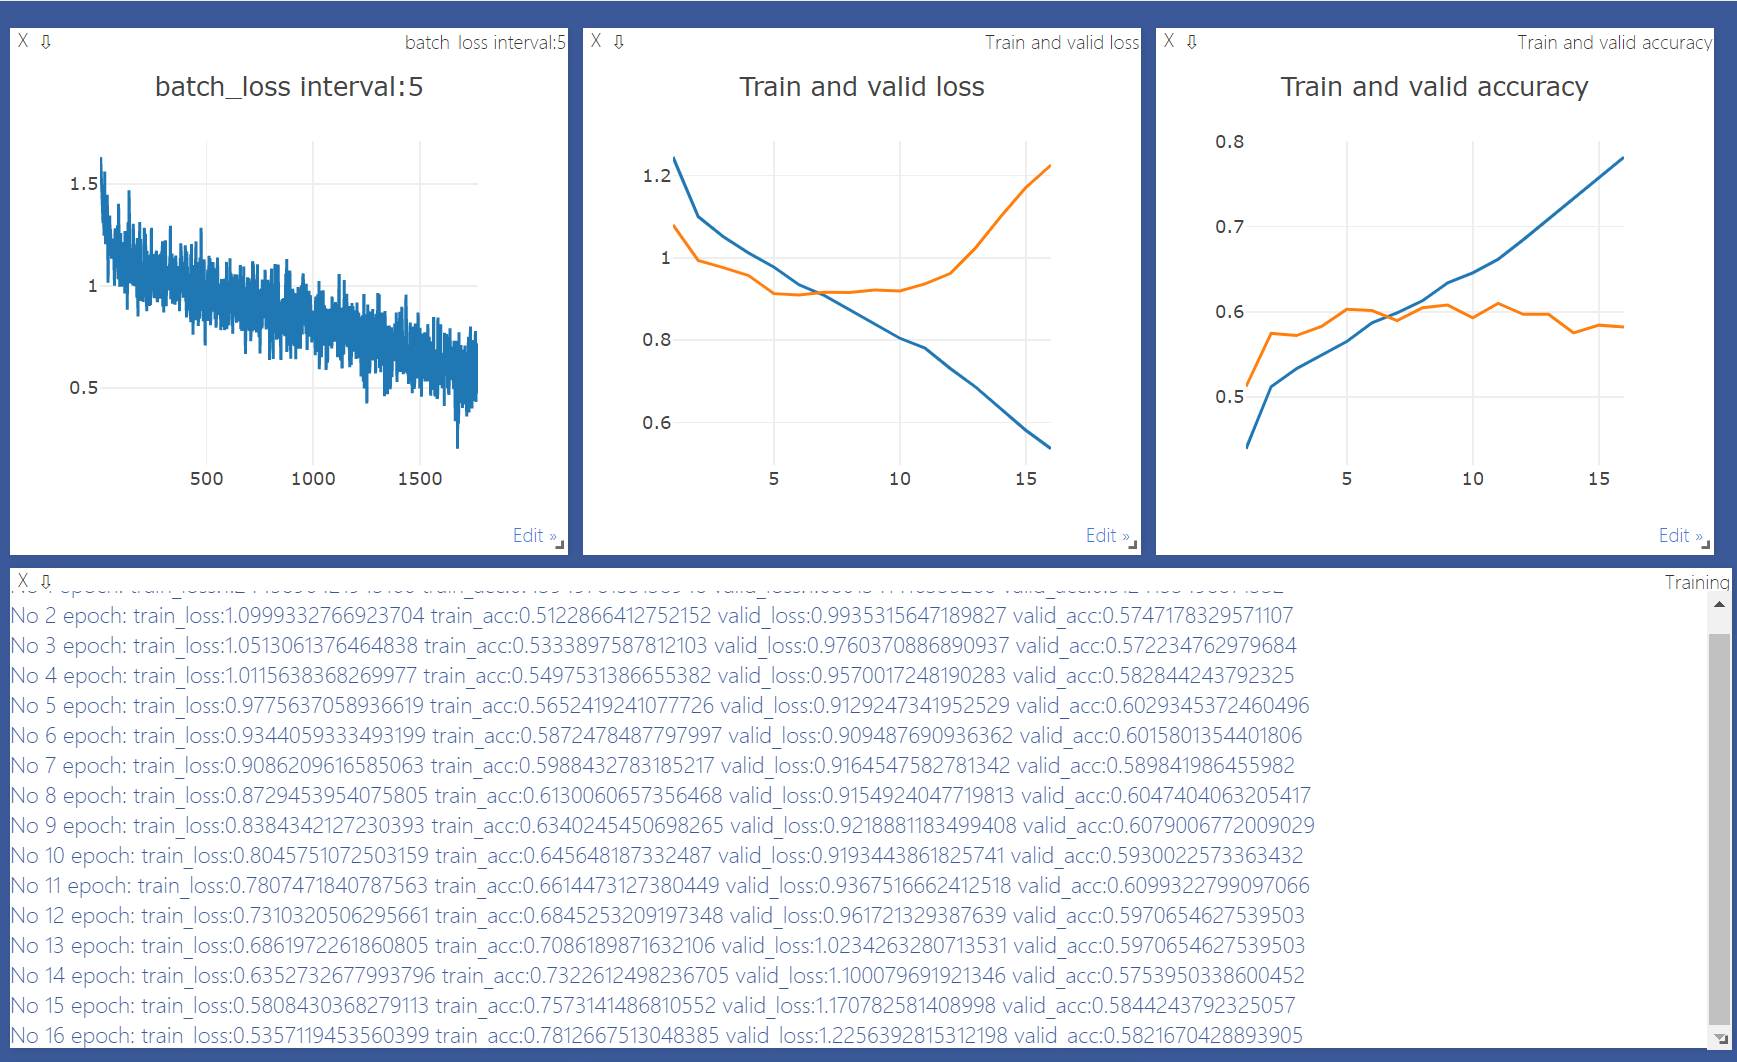

In [2]:
##
config["embedding_dim"] = 50
config["text_hidden_size"] = 50
config

{'task': 'CLS',
 'embedding_dim': 50,
 'embedding': None,
 'freeze_embedding': True,
 'text_hidden_size': 50,
 'text_layers': 1,
 'max_tokens': 512,
 'uniform_bound': 0.1,
 'img_input_size': 2048,
 'img_encoder_layers': 1,
 'attention_nhead': 4,
 'fusion_nheads': 4,
 'dropout': 0.1,
 'output_size': 5,
 'bias_init': 1.0}

In [3]:
%%time
batch_size = 64
workers = 4
train_set, valid_set, test_set= load_glove_data(split811data, config)
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()
print(get_parameter_number(model))

_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 5
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/torch1.7/lib/python3.8/site-packages/torch/nn/modules/rnn.py:58: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
Setting up a new session...


{'Total': 2498805, 'Trainable': 357105}


No 1 epoch: 554it [01:15,  7.37it/s]
No 2 epoch: 554it [01:14,  7.42it/s]
No 3 epoch: 554it [01:15,  7.34it/s]
No 4 epoch: 554it [01:15,  7.30it/s]
No 5 epoch: 554it [01:14,  7.45it/s]
No 6 epoch: 554it [01:17,  7.19it/s]
No 7 epoch: 554it [01:15,  7.37it/s]
No 8 epoch: 554it [01:16,  7.27it/s]
No 9 epoch: 554it [01:14,  7.40it/s]
No 10 epoch: 554it [01:15,  7.35it/s]
No 11 epoch: 554it [01:15,  7.37it/s]
No 12 epoch: 554it [01:15,  7.32it/s]
No 13 epoch: 554it [01:15,  7.36it/s]
No 14 epoch: 554it [01:15,  7.35it/s]
No 15 epoch: 554it [01:14,  7.44it/s]
/home/ly/miniconda3/envs/torch1.7/lib/python3.8/site-packages/torch/nn/modules/rnn.py:742: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729096996/work/aten/src/ATen/native/cudnn/RNN.cpp:775.)
  re

CPU times: user 13min 56s, sys: 4min 14s, total: 18min 10s
Wall time: 21min 9s


((0.5792325056433408, 0.5790283318290999), 0.9419079883103985)

In [4]:
res

{'min_valid_loss': 0.9354819912942753,
 'min_valid_loss_epoch': 10,
 'min_loss_train_acc': 0.5823952602623783,
 'min_valid_loss_train_loss': 0.9534690039166948,
 'min_loss_valid_acc': 0.5900677200902934,
 'last_valid_acc': 0.5961625282167042,
 'last_train_acc': 0.6124418112568768,
 'last_epoch': 15,
 'last_train_loss': 0.8861465481310002,
 'last_valid_loss': 0.9414123347058522}

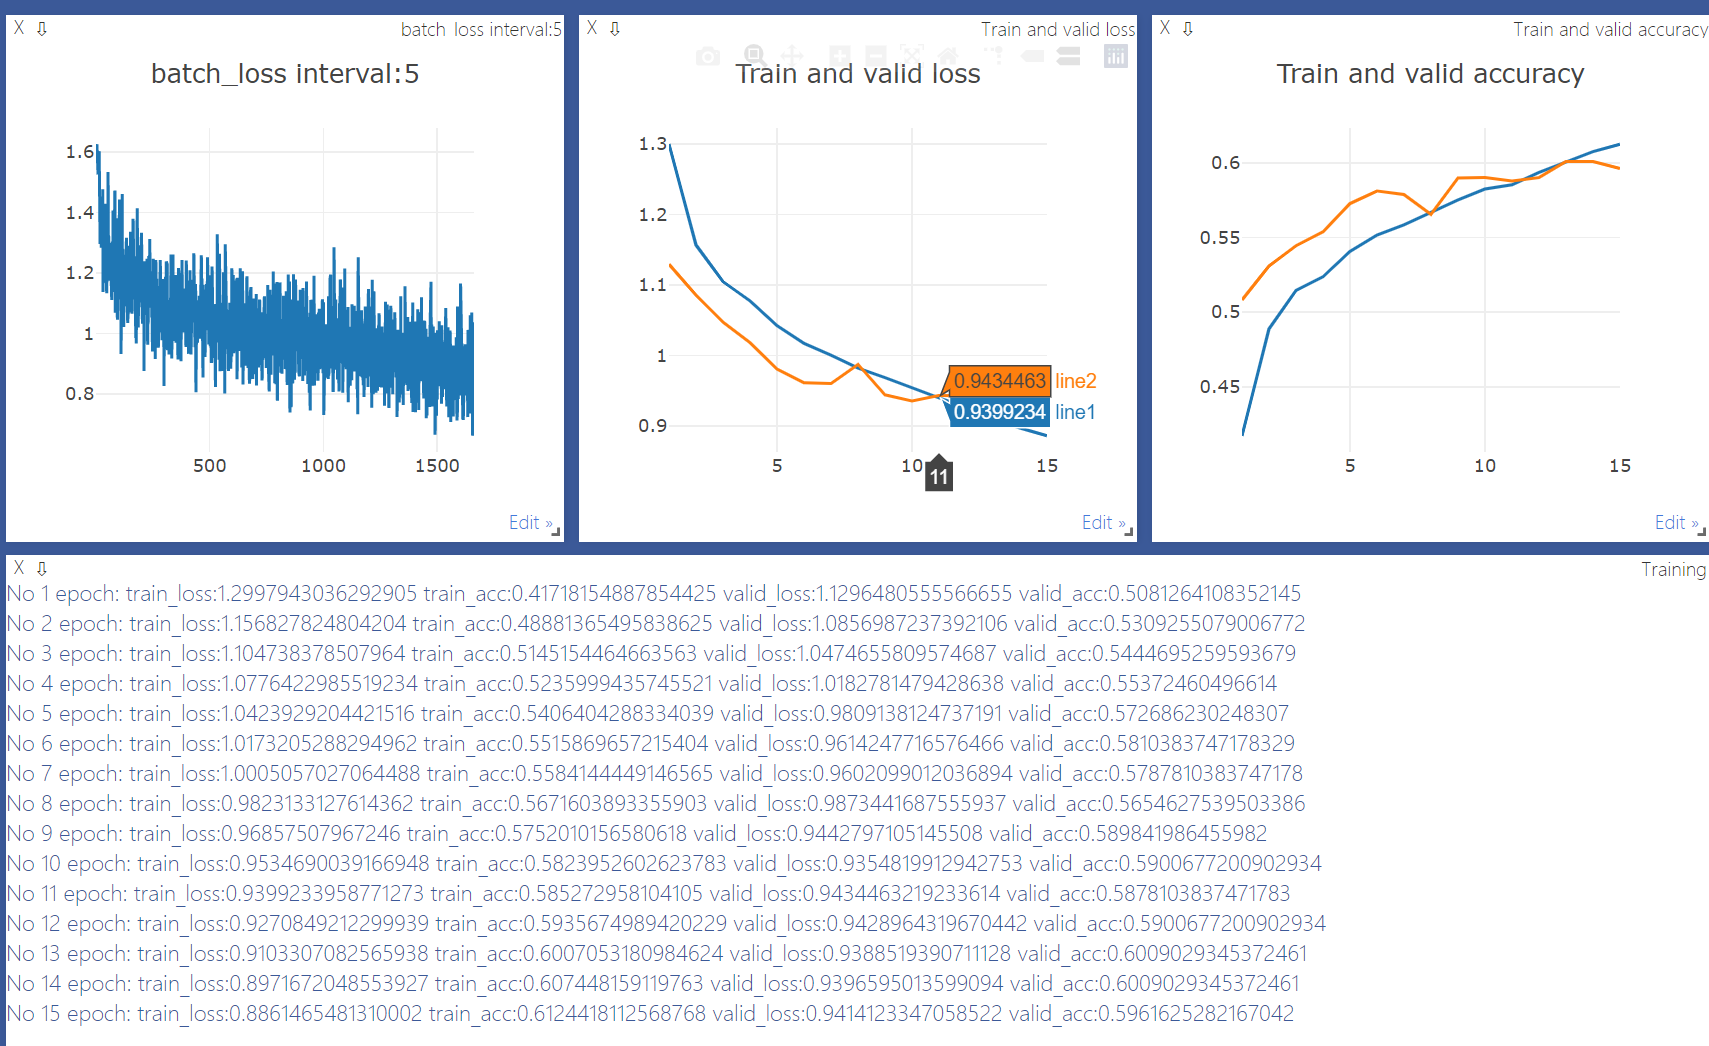

In [1]:
import sys
sys.path.append("/home/ly/workspace/mmsa")
seed = 1123213
import numpy as np
import torch
from torch import nn
from torch import optim

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
from models.lymodel5 import *
from utils.train import *
from typing import *
from collections import Counter
from utils.load_yelp import *
from utils.dataset import *
from utils.train import *
from utils.train import *

config

{'task': 'CLS',
 'embedding_dim': 100,
 'embedding': None,
 'freeze_embedding': True,
 'text_hidden_size': 100,
 'text_layers': 1,
 'max_tokens': 512,
 'uniform_bound': 0.1,
 'img_input_size': 2048,
 'img_encoder_layers': 1,
 'attention_nhead': 4,
 'fusion_nheads': 4,
 'dropout': 0.1,
 'output_size': 5,
 'bias_init': 1.0}

In [2]:
##
config["embedding_dim"] = 50
config["text_hidden_size"] = 50
config

{'task': 'CLS',
 'embedding_dim': 50,
 'embedding': None,
 'freeze_embedding': True,
 'text_hidden_size': 50,
 'text_layers': 1,
 'max_tokens': 512,
 'uniform_bound': 0.1,
 'img_input_size': 2048,
 'img_encoder_layers': 1,
 'attention_nhead': 4,
 'fusion_nheads': 4,
 'dropout': 0.1,
 'output_size': 5,
 'bias_init': 1.0}

In [4]:
%%time
batch_size = 64
workers = 4
train_set, valid_set, test_set= load_glove_data(split811data, config)
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()
print(get_parameter_number(model))

_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 5
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)
eval_model(model, test_loader, loss)

Setting up a new session...


{'Total': 2498805, 'Trainable': 357105}


No 1 epoch: 554it [01:17,  7.18it/s]
No 2 epoch: 554it [01:18,  7.02it/s]
No 3 epoch: 554it [01:18,  7.06it/s]
No 4 epoch: 554it [01:18,  7.05it/s]
No 5 epoch: 554it [01:19,  6.97it/s]
No 6 epoch: 554it [01:17,  7.11it/s]
No 7 epoch: 554it [01:19,  6.98it/s]
No 8 epoch: 554it [01:20,  6.87it/s]
No 9 epoch: 554it [01:20,  6.90it/s]
No 10 epoch: 554it [01:19,  7.01it/s]
No 11 epoch: 554it [01:18,  7.04it/s]
No 12 epoch: 554it [01:18,  7.03it/s]
No 13 epoch: 554it [01:18,  7.02it/s]
No 14 epoch: 554it [01:18,  7.03it/s]
No 15 epoch: 554it [01:18,  7.06it/s]
No 16 epoch: 554it [01:19,  6.95it/s]
No 17 epoch: 554it [01:19,  6.93it/s]
No 18 epoch: 554it [01:20,  6.86it/s]


CPU times: user 16min 55s, sys: 5min 43s, total: 22min 39s
Wall time: 26min 54s


((0.5713318284424379, 0.566740245042279), 0.9531374638828682)

In [2]:
## 调参
##
config["embedding_dim"] = 100
config["text_hidden_size"] = 100
config

{'task': 'CLS',
 'embedding_dim': 100,
 'embedding': None,
 'freeze_embedding': True,
 'text_hidden_size': 100,
 'text_layers': 1,
 'max_tokens': 512,
 'uniform_bound': 0.1,
 'img_input_size': 2048,
 'img_encoder_layers': 1,
 'attention_nhead': 4,
 'fusion_nheads': 4,
 'dropout': 0.1,
 'output_size': 5,
 'bias_init': 1.0}

In [3]:
%%time
batch_size = 64
workers = 4
train_set, valid_set, test_set= load_glove_data(split811data, config)
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()
print(get_parameter_number(model))

_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 5
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/torch1.7/lib/python3.8/site-packages/torch/nn/modules/rnn.py:58: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
Setting up a new session...


{'Total': 5297605, 'Trainable': 1014205}


No 1 epoch: 554it [01:22,  6.74it/s]
No 2 epoch: 554it [01:21,  6.80it/s]
No 3 epoch: 554it [01:19,  6.99it/s]
No 4 epoch: 554it [01:20,  6.89it/s]
No 5 epoch: 554it [01:21,  6.82it/s]
No 6 epoch: 554it [01:21,  6.76it/s]
No 7 epoch: 554it [01:22,  6.74it/s]
No 8 epoch: 554it [01:23,  6.66it/s]
No 9 epoch: 554it [01:22,  6.73it/s]
No 10 epoch: 554it [01:23,  6.66it/s]
No 11 epoch: 554it [01:22,  6.71it/s]
No 12 epoch: 554it [01:23,  6.64it/s]
No 13 epoch: 554it [01:23,  6.64it/s]
No 14 epoch: 554it [01:25,  6.48it/s]
/home/ly/miniconda3/envs/torch1.7/lib/python3.8/site-packages/torch/nn/modules/rnn.py:742: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729096996/work/aten/src/ATen/native/cudnn/RNN.cpp:775.)
  result = _VF.gru(input, batch_sizes, hx,

CPU times: user 14min 3s, sys: 4min 35s, total: 18min 38s
Wall time: 21min 30s


((0.600451467268623, 0.5948091892222451), 0.9003320957145088)

In [2]:
## 调head数
## 调参
##
config["embedding_dim"] = 100
config["text_hidden_size"] = 100
config["attention_nhead"] = 1
config["fusion_nheads"] = 1
config

{'task': 'CLS',
 'embedding_dim': 100,
 'embedding': None,
 'freeze_embedding': True,
 'text_hidden_size': 100,
 'text_layers': 1,
 'max_tokens': 512,
 'uniform_bound': 0.1,
 'img_input_size': 2048,
 'img_encoder_layers': 1,
 'attention_nhead': 1,
 'fusion_nheads': 1,
 'dropout': 0.1,
 'output_size': 5,
 'bias_init': 1.0}

In [4]:
%%time
batch_size = 64
workers = 4
train_set, valid_set, test_set= load_glove_data(split811data, config)
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()
print(get_parameter_number(model))

_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 5
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)
eval_model(model, test_loader, loss)

Setting up a new session...


{'Total': 5297605, 'Trainable': 1014205}


No 1 epoch: 554it [01:17,  7.19it/s]
No 2 epoch: 554it [01:18,  7.06it/s]
No 3 epoch: 554it [01:18,  7.09it/s]
No 4 epoch: 554it [01:16,  7.21it/s]
No 5 epoch: 554it [01:17,  7.11it/s]
No 6 epoch: 554it [01:18,  7.07it/s]
No 7 epoch: 554it [01:19,  7.01it/s]
No 8 epoch: 554it [01:18,  7.09it/s]
No 9 epoch: 554it [01:18,  7.07it/s]
No 10 epoch: 554it [01:17,  7.13it/s]
No 11 epoch: 554it [01:17,  7.13it/s]
No 12 epoch: 554it [01:20,  6.92it/s]
No 13 epoch: 554it [01:19,  6.93it/s]
/home/ly/miniconda3/envs/torch1.7/lib/python3.8/site-packages/torch/nn/modules/rnn.py:742: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729096996/work/aten/src/ATen/native/cudnn/RNN.cpp:775.)
  result = _VF.gru(input, batch_sizes, hx, self._flat_weights, self.bias,


CPU times: user 12min 39s, sys: 3min 46s, total: 16min 26s
Wall time: 19min 3s


((0.5945823927765237, 0.5974526784331702), 0.9184924161461083)

In [5]:
res

{'min_valid_loss': 0.8969119743622722,
 'min_valid_loss_epoch': 8,
 'min_loss_train_acc': 0.6112850895753985,
 'min_valid_loss_train_loss': 0.8791065030448408,
 'min_loss_valid_acc': 0.6060948081264108,
 'last_valid_acc': 0.590744920993228,
 'last_train_acc': 0.7077726054450557,
 'last_epoch': 13,
 'last_train_loss': 0.680634899352296,
 'last_valid_loss': 1.0277616679802974}